Name - Jaival Bhavsar

AIML Sem 7

Deep Learning Practical Exam 01
10/07/2023

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense

# Importing data
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

In [2]:
train_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [3]:
train_data = train_data.drop(['Unnamed: 0', 'New_Price'], axis=1)
test_data = test_data.drop(['Unnamed: 0', 'New_Price'], axis=1)
train_data['Flag'] = 1
test_data['Flag'] = 0

In [4]:
combined_data = pd.concat([train_data, test_data])

# Preprocessing data
combined_data['Mileage'] = combined_data['Mileage'].str.extract('(\d+\.\d+|\d+)').astype(float)
combined_data['Engine'] = combined_data['Engine'].str.extract('(\d+)').astype(float).fillna(0).astype(int)
combined_data['Power'] = combined_data['Power'].str.extract('(\d+\.\d+|\d+)').astype(float)

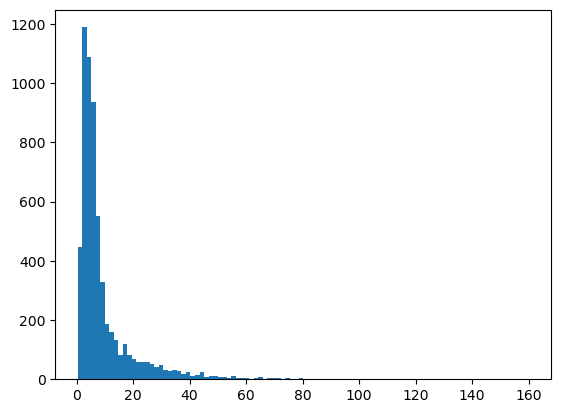

In [5]:
#plot the histogram of the target variable
plt.hist(combined_data['Price'], bins=100)
plt.show()

In [6]:
# Perform one-hot encoding on the combined dataset
onehot_encoder = OneHotEncoder(sparse=False)
encoded_data = onehot_encoder.fit_transform(combined_data)

c:\Users\jaiva\anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [7]:
# Split the combined data back into train and test datasets
X_train = encoded_data[combined_data['Flag'] == 1, :-1]
y_train = encoded_data[combined_data['Flag'] == 1, -1]
X_test = encoded_data[combined_data['Flag'] == 0, :-1]

In [8]:
# Fill missing values with 0
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)

In [9]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

C:\Users\jaiva\AppData\Local\Temp\ipykernel_16652\808977894.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = train_data.corr()


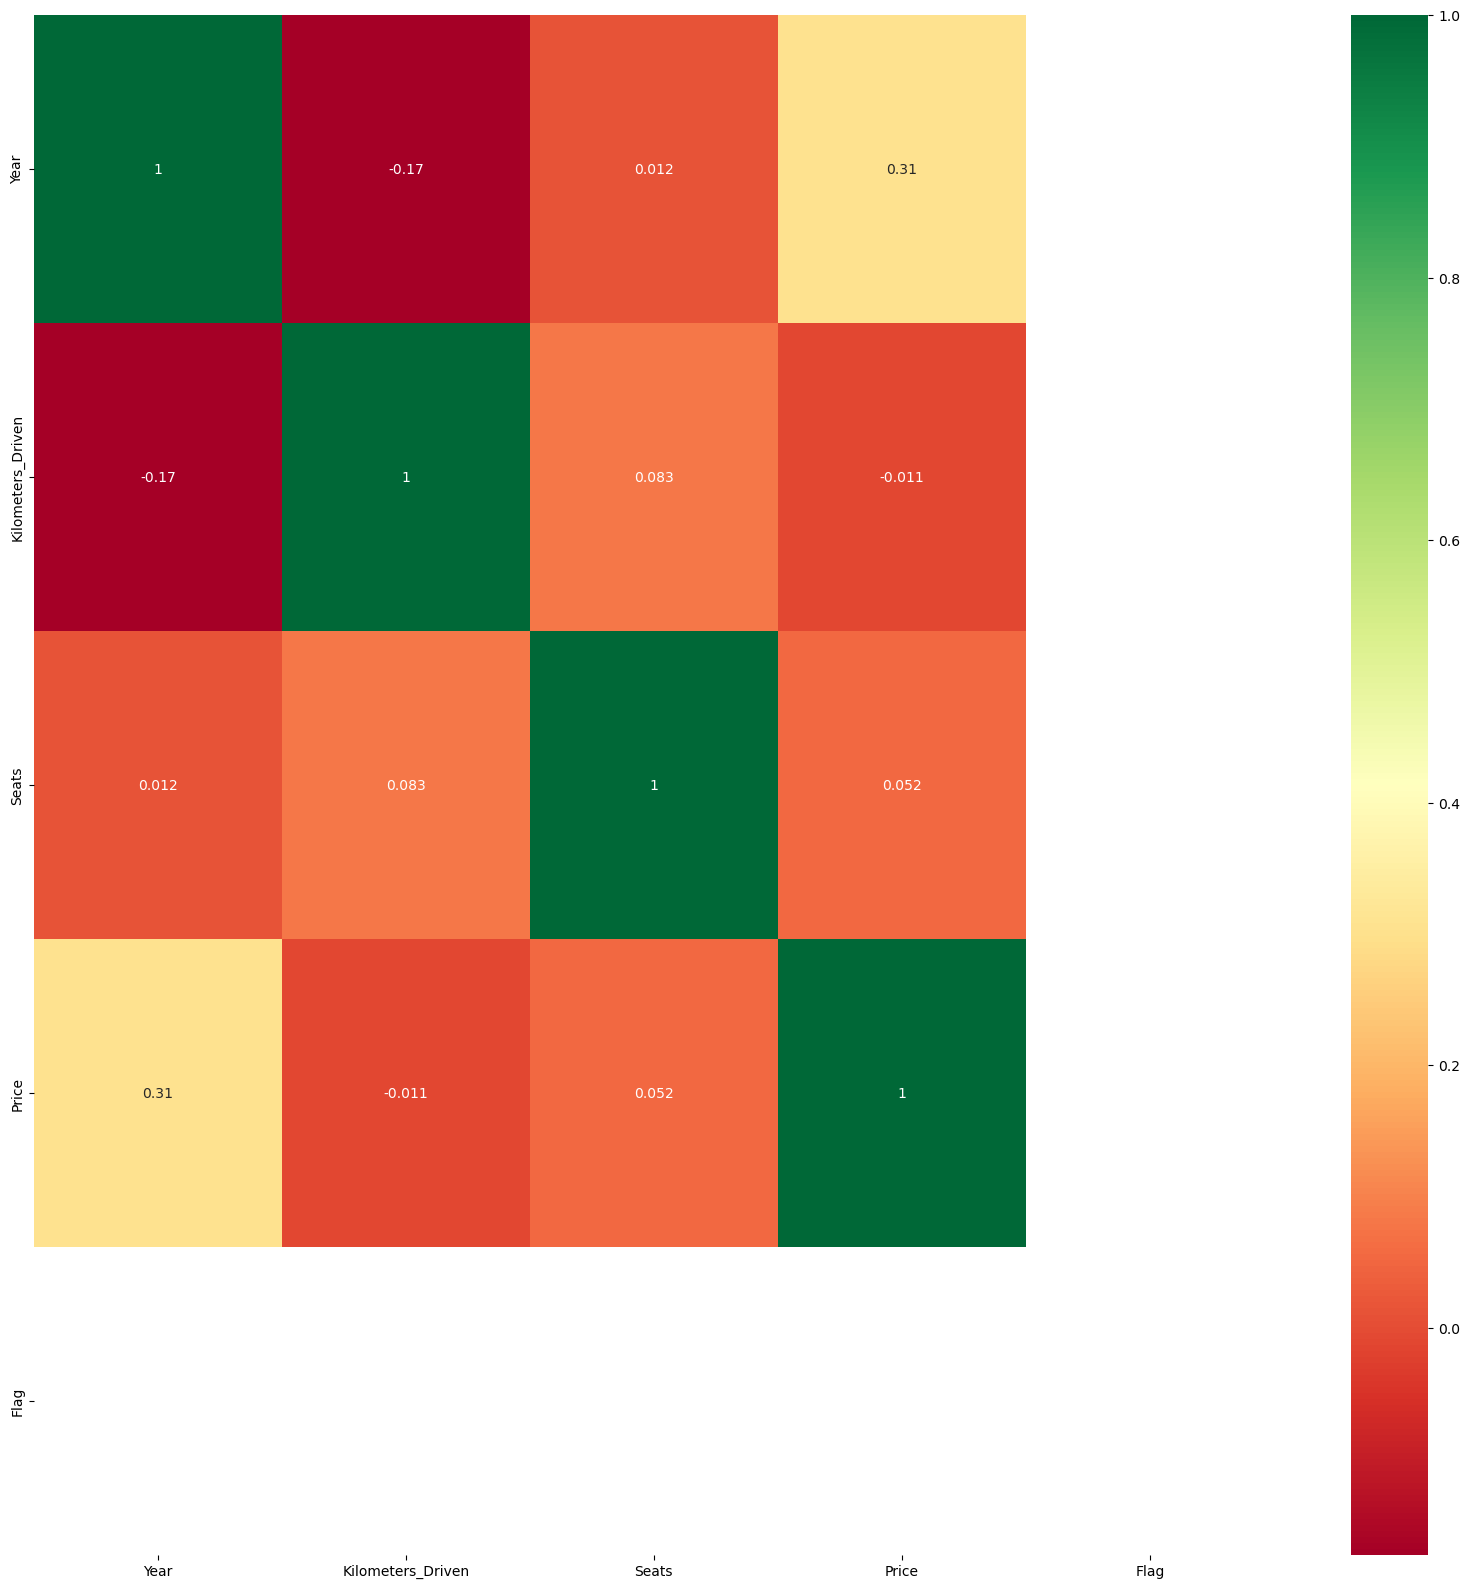

In [10]:
#plot heatmap to show correlation between price and other features
import seaborn as sns
corrmat = train_data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
g=sns.heatmap(train_data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

<Axes: xlabel='Year', ylabel='Price'>

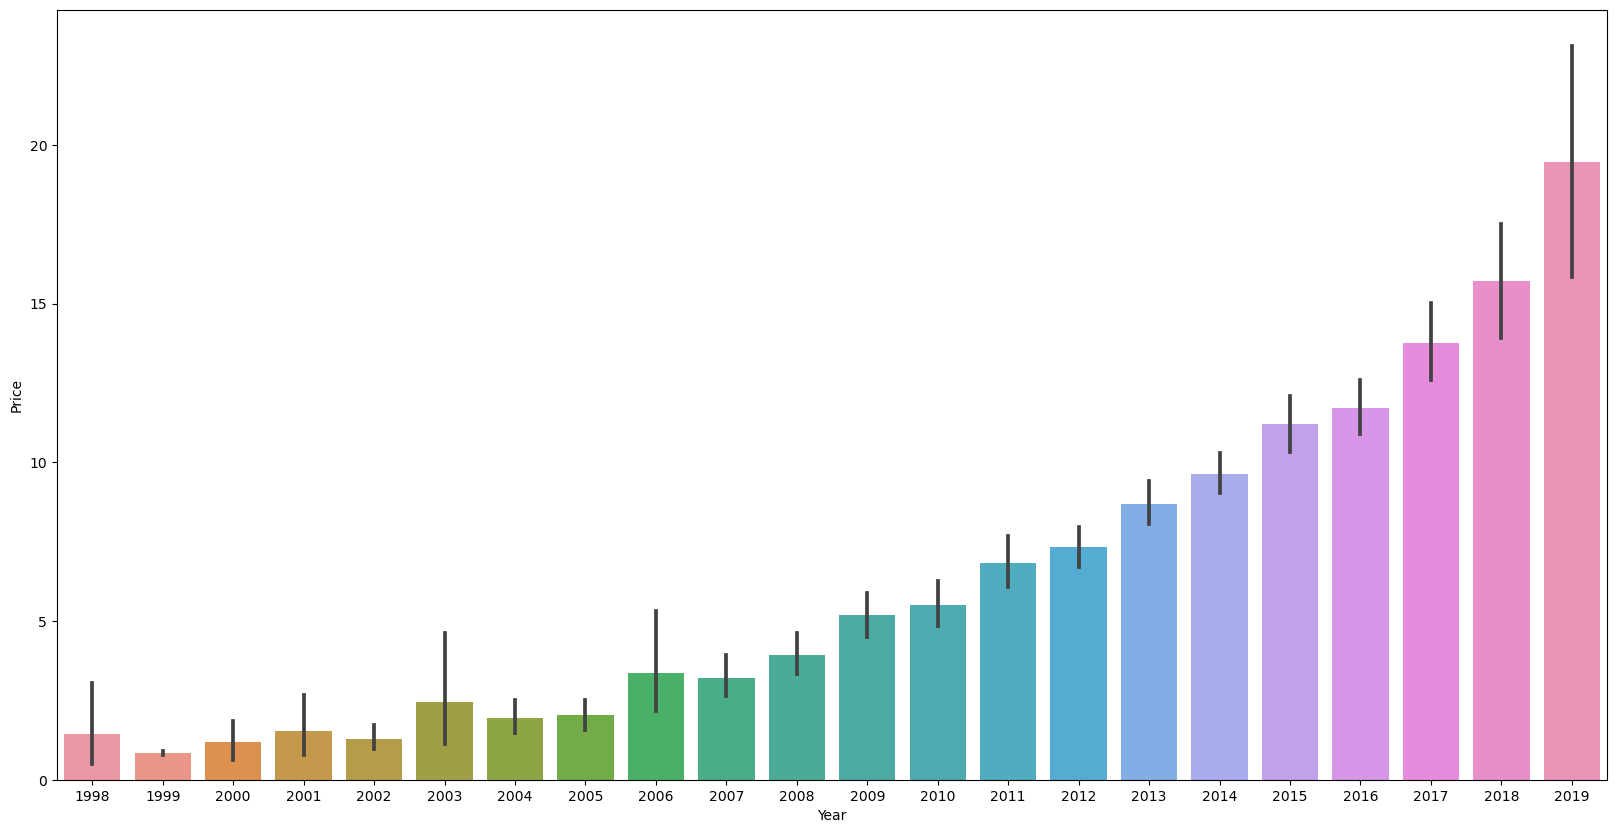

In [11]:
#using seaborn to plot the distribution of price with respect to the year of manufacture
plt.figure(figsize=(20,10))
sns.barplot(x='Year', y='Price', data=train_data)

In [12]:
# Build the ANN model with ReLU activation
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='relu'))

In [13]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
#use early stopping to optimally terminate training through callbacks
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3)

# Train the model
history=model.fit(X_train_scaled, y_train, epochs=40, batch_size=32, validation_split=0.2, callbacks=[early_stopping])


Epoch 1/40
151/151 [==============================] - 1s 5ms/step - loss: 0.1272 - accuracy: 0.9188 - val_loss: 0.0455 - val_accuracy: 0.9934
Epoch 2/40
151/151 [==============================] - 1s 5ms/step - loss: 0.0764 - accuracy: 0.9580 - val_loss: 0.0498 - val_accuracy: 0.9909
Epoch 3/40
151/151 [==============================] - 1s 4ms/step - loss: 0.0198 - accuracy: 0.9965 - val_loss: 0.0320 - val_accuracy: 1.0000
Epoch 4/40
151/151 [==============================] - 1s 4ms/step - loss: 0.0074 - accuracy: 0.9990 - val_loss: 0.0264 - val_accuracy: 1.0000
Epoch 5/40
151/151 [==============================] - 1s 4ms/step - loss: 0.0037 - accuracy: 0.9992 - val_loss: 0.0368 - val_accuracy: 1.0000
Epoch 6/40
151/151 [==============================] - 1s 4ms/step - loss: 0.0022 - accuracy: 1.0000 - val_loss: 0.0266 - val_accuracy: 1.0000
Epoch 7/40
151/151 [==============================] - 1s 5ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.0349 - val_accuracy: 1.0000


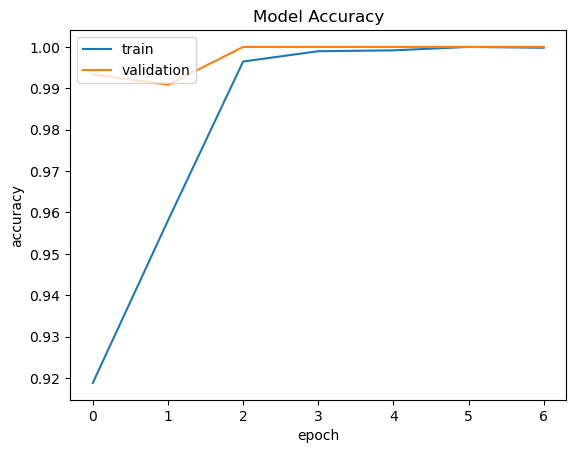

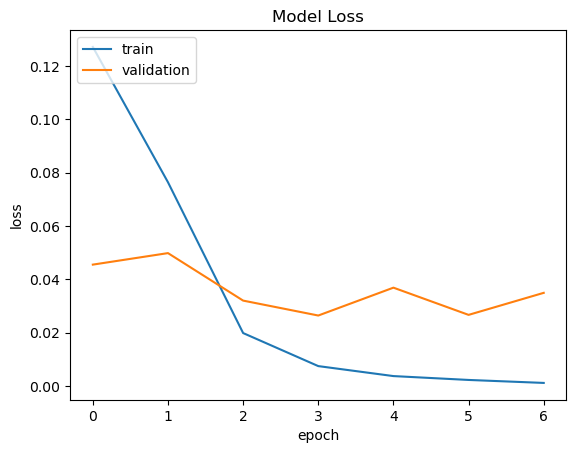

In [14]:
#plot the training and validation accuracy and loss at each epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()



In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1037568   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,047,937
Trainable params: 1,047,937
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Predict on the test data
predictions = model.predict(X_test_scaled)

# Save the predictions to a CSV file
np.savetxt('predictions.csv', predictions, delimiter=',')

39/39 [==============================] - 0s 1ms/step


In [17]:
# Print the predicted prices
print(predictions)

[[0.7520545 ]
 [0.9863187 ]
 [1.0496392 ]
 ...
 [1.0008506 ]
 [0.99489564]
 [0.9928218 ]]


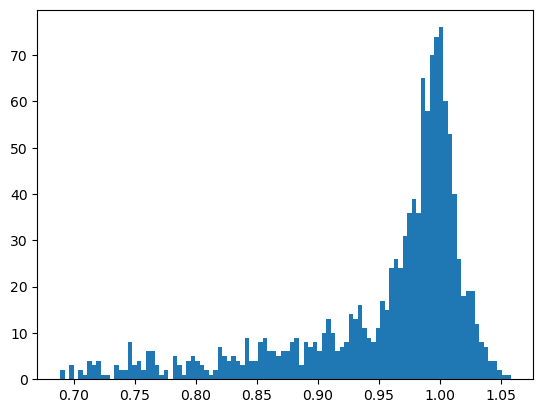

In [18]:
#plot the histogram of the predicted prices
plt.hist(predictions, bins=100)
plt.show()

In [ ]:
pip install -U keras-tuner

In [ ]:
#using keras tuner
import kerastuner as kt
def build_model(hp):
    model = Sequential()
    model.add(Dense(128, activation='relu', input_dim=X_train_scaled.shape[1]))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(32, activation='relu'))
    model.add(Dense(1, activation='relu'))
    model.compile(optimizer='adam', loss='mean_squared_error',metrics=['accuracy'])
    return model

tuner = kt.Hyperband(build_model,
                        objective='val_accuracy',
                        max_epochs=10,
                        factor=3,
                        directory='my_dir',
                        project_name='intro_to_kt')

stop_early = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)
#fix list index out of range for best_hps and continue with the rest of the code

tuner.search(X_train_scaled, y_train, epochs=20, validation_split=0.2, callbacks=[stop_early])
#fix list index out of range for best_hps and continue with the rest of the code
best_hps=tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")
# Build the model with the optimal hyperparameters and train it on the data for 50 epochs
model = tuner.hypermodel.build(best_hps)
history=model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

In [ ]:
model2.summary()